In [54]:
import numpy as np
import pandas as pd

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# !pip install seaborn

In [24]:
df = pd.read_excel('/home/ekim_reverse/study/Python.study/df_clean.xlsx')

In [ ]:
df

In [25]:
df_01 = df.loc[:,"dm":"AS1_NFS"]

In [26]:
df_01

,dm,sex,age,glu,ast,alt,tchl,tg,bmi,bmigr,...,hba1c,edate,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS
0,1,1,48,140.0,23,32.0,211,178,22.045197,2,...,6.2,17684,0,1.1,5.1,35,36,192,34.996451,-2.174317
1,1,2,73,NaN,22,17.0,125,126,24.408284,3,...,7.7,16922,0,0.7,3.9,9,28,374,43.885864,-3.051632
2,1,1,52,138.0,20,33.0,254,192,24.935773,3,...,NaN,16162,1,1.1,4.4,25,37,256,34.914776,-3.052146
3,1,2,58,98.0,16,21.0,211,362,26.595698,4,...,6.7,18718,1,0.6,3.8,14,32,264,25.490166,-1.941114
4,1,2,50,132.0,20,24.0,245,194,25.161263,4,...,7.7,17867,1,0.8,4.8,15,39,303,29.574193,-3.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0,2,72,82.0,29,14.0,184,141,21.541406,2,...,5.1,19540,0,0.8,4.4,16,47,116,13.242085,0.028361
3043,0,2,67,93.0,16,15.0,177,122,31.307901,4,...,5.7,19905,1,0.9,4.7,13,35,283,39.056741,-2.293666
3044,0,1,73,92.0,35,44.0,153,106,22.975779,2,...,5.5,19844,0,1.2,4.4,26,42,305,25.552291,-2.957247
3045,0,2,58,90.0,21,15.0,153,133,25.565263,4,...,5.9,19814,0,0.8,4.5,16,51,371,15.285986,-4.190857


In [27]:
df_01.columns

Index(['dm', 'sex', 'age', 'glu', 'ast', 'alt', 'tchl', 'tg', 'bmi', 'bmigr',
       'waist', 'hsi', 'fib4', 'homa', 'hba1c', 'edate', 'nafld',
       'AS1_CREATININE', 'AS1_ALBUMIN', 'AS1_R_GTP', 'AS1_HDL', 'AS1_PLAT_N',
       'AS1_FLI', 'AS1_NFS'],
      dtype='object')

In [28]:
result_01 = sm.ols(formula = 'dm~sex+age+glu+ast+alt+tchl+tg+bmi+bmigr+waist+hsi+fib4+homa+hba1c+edate+nafld+AS1_CREATININE+AS1_ALBUMIN+AS1_R_GTP+AS1_HDL+AS1_PLAT_N+AS1_FLI+AS1_NFS', data = df_01).fit()

In [29]:
result_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dm   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     288.9
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:04:30   Log-Likelihood:                 982.98
No. Observations:                2995   AIC:                            -1918.
Df Residuals:                    2971   BIC:                            -1774.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.9651      0.166     29.999      0.000       4.641       5.290
sex               -0.0030      0.010     -0.300      0.764      -0.023       0.017
age               -0.0010      0.001     -1.614      0.107      -0.002       0.000
glu                0.0018      0.000      5.423      0.000       0.001       0.002
ast               -0.0008      0.000     -1.897      0.058      -0.002    2.55e-05
alt                0.0013      0.001      2.354      0.019       0.000       0.002
tchl              -0.0002      0.000     -1.785      0.074      -0.000    1.79e-05
tg             -7.143e-05    4.9e-05     -1.456      0.145      -0.000    2.47e-05
bmi                0.0025      0.004      0.643      0.520      -0.005       0.010
bmigr             -0.0181      0.007     -2.472      0.013      -0.032      -0.004
waist              0.0006      0.001      0.978      0.328      -0.001       0.002
hsi               -0.0004      0.003     -0.122      0.903      -0.006       0.005
fib4               0.0094      0.007      1.385      0.166      -0.004       0.023
homa               0.0021      0.001      1.505      0.132      -0.001       0.005
hba1c              0.1586      0.008     18.963      0.000       0.142       0.175
edate             -0.0003   7.17e-06    -45.354      0.000      -0.000      -0.000
nafld              0.0168      0.012      1.432      0.152      -0.006       0.040
AS1_CREATININE    -0.0632      0.026     -2.406      0.016      -0.115      -0.012
AS1_ALBUMIN        0.1211      0.013      9.061      0.000       0.095       0.147
AS1_R_GTP          0.0002   8.45e-05      2.861      0.004     7.6e-05       0.000
AS1_HDL           -0.0007      0.000     -1.932      0.053      -0.001    1.06e-05
AS1_PLAT_N         0.0004      0.000      3.041      0.002       0.000       0.001
AS1_FLI           -0.0004      0.000     -1.503      0.133      -0.001       0.000
AS1_NFS            0.0257      0.009      2.898      0.004       0.008       0.043
==============================================================================
Omnibus:                     1520.220   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19106.922
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      14.636   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df_01.loc[380]

dm                    1.000000
sex                   1.000000
age                  47.000000
glu                        NaN
ast                  31.000000
alt                  81.000000
tchl                185.000000
tg                  401.000000
bmi                  30.348268
bmigr                 4.000000
waist                99.000000
hsi                  52.251494
fib4                  0.627476
homa                       NaN
hba1c                 6.600000
edate             16618.000000
nafld                 1.000000
AS1_CREATININE        1.100000
AS1_ALBUMIN           4.000000
AS1_R_GTP            33.000000
AS1_HDL              33.000000
AS1_PLAT_N          269.000000
AS1_FLI              69.792211
AS1_NFS              -2.874057
Name: 380, dtype: float64

In [31]:
df_02 = df.loc[:380][:]

In [32]:
df_02

,id,dm,sex,age,glu,ast,alt,tchl,tg,bmi,...,hba1c,edate,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS
0,EPI18_079_000033,1,1,48,140.0,23,32.0,211,178,22.045197,...,6.2,17684,0,1.1,5.1,35,36,192,34.996451,-2.174317
1,EPI18_079_000051,1,2,73,NaN,22,17.0,125,126,24.408284,...,7.7,16922,0,0.7,3.9,9,28,374,43.885864,-3.051632
2,EPI18_079_000069,1,1,52,138.0,20,33.0,254,192,24.935773,...,NaN,16162,1,1.1,4.4,25,37,256,34.914776,-3.052146
3,EPI18_079_000075,1,2,58,98.0,16,21.0,211,362,26.595698,...,6.7,18718,1,0.6,3.8,14,32,264,25.490166,-1.941114
4,EPI18_079_000126,1,2,50,132.0,20,24.0,245,194,25.161263,...,7.7,17867,1,0.8,4.8,15,39,303,29.574193,-3.596537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,EPI18_079_009938,1,1,61,109.0,23,40.0,174,148,28.890805,...,6.6,19814,1,0.9,4.4,22,37,350,34.055639,-4.119336
377,EPI18_079_009963,1,1,54,91.0,22,25.0,214,168,22.291338,...,7.0,16922,0,0.9,4.1,24,39,349,30.572144,-3.917360
378,EPI18_079_009966,1,2,58,90.0,15,19.0,216,442,23.936128,...,6.8,16922,1,0.7,4.3,18,33,330,44.201866,-2.278688
379,EPI18_079_010006,1,2,56,112.0,30,35.0,193,157,37.127740,...,7.0,19967,1,0.8,4.6,20,40,336,93.212007,-1.911216


In [33]:
result_02 = sm.ols(formula = 'dm~sex+age+glu+ast+alt+tchl+tg+bmi+waist+hsi+fib4+homa+hba1c+edate+nafld+AS1_CREATININE+AS1_ALBUMIN+AS1_R_GTP+AS1_HDL+AS1_PLAT_N+AS1_FLI+AS1_NFS', data = df_02).fit()

In [34]:
result_02.summary()

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dm   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -14.00
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               1.00
Time:                        16:05:14   Log-Likelihood:                 9991.8
No. Observations:                 331   AIC:                        -1.994e+04
Df Residuals:                     308   BIC:                        -1.985e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0000   3.54e-14   2.82e+13      0.000       1.000       1.000
sex             1.162e-16   3.48e-15      0.033      0.973   -6.74e-15    6.97e-15
age            -1.258e-17   1.94e-16     -0.065      0.948   -3.94e-16    3.69e-16
glu             1.019e-17   5.38e-17      0.189      0.850   -9.57e-17    1.16e-16
ast             3.253e-19   3.56e-16      0.001      0.999   -7.01e-16    7.01e-16
alt             1.225e-17   2.58e-16      0.047      0.962   -4.96e-16     5.2e-16
tchl            4.743e-19   3.19e-17      0.015      0.988   -6.22e-17    6.32e-17
tg              2.263e-18   1.51e-17      0.150      0.881   -2.75e-17     3.2e-17
bmi            -1.735e-18   1.38e-15     -0.001      0.999   -2.72e-15    2.72e-15
waist           4.445e-18   2.03e-16      0.022      0.983   -3.95e-16    4.04e-16
hsi            -4.337e-17   1.16e-15     -0.037      0.970   -2.33e-15    2.25e-15
fib4           -5.898e-17   2.89e-15     -0.020      0.984   -5.74e-15    5.62e-15
homa            2.819e-18   1.74e-16      0.016      0.987    -3.4e-16    3.45e-16
hba1c          -4.337e-17   1.59e-15     -0.027      0.978   -3.17e-15    3.08e-15
edate          -8.572e-19   1.28e-18     -0.672      0.502   -3.37e-18    1.65e-18
nafld          -2.255e-16   3.58e-15     -0.063      0.950   -7.28e-15    6.83e-15
AS1_CREATININE -9.992e-16   8.74e-15     -0.114      0.909   -1.82e-14    1.62e-14
AS1_ALBUMIN     1.665e-16   4.31e-15      0.039      0.969   -8.31e-15    8.64e-15
AS1_R_GTP        2.66e-18   1.07e-17      0.249      0.803   -1.83e-17    2.37e-17
AS1_HDL         3.109e-17   1.34e-16      0.232      0.817   -2.33e-16    2.95e-16
AS1_PLAT_N     -1.735e-18   3.82e-17     -0.045      0.964   -7.69e-17    7.35e-17
AS1_FLI        -9.758e-18   7.77e-17     -0.126      0.900   -1.63e-16    1.43e-16
AS1_NFS         4.857e-17   2.44e-15      0.020      0.984   -4.76e-15    4.86e-15
==============================================================================
Omnibus:                        3.116   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.900
Skew:                          -0.225   Prob(JB):                        0.235
Kurtosis:                       3.091   Cond. No.                     6.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#다중공선성

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
plot_01 = pd.read_excel('/home/ekim_reverse/PyCode/study/df_clean_deci_phase_d-bmi+index_color.xlsx')

In [5]:
plot_03=plot_01.loc[:380,:]

In [6]:
plot_03.isnull().sum()

id                 0
phase              0
sex                0
age                0
glu               28
ast/alt            0
tchl               0
tg                 0
bmigr              0
hsi                0
fib4               0
homa              35
hba1c             22
nafld              0
AS1_CREATININE     0
AS1_ALBUMIN        0
AS1_R_GTP          0
AS1_HDL            0
AS1_PLAT_N         0
AS1_FLI            0
AS1_NFS            0
NAFLD1_FLI         0
GROUP              0
dm                 0
dtype: int64

In [7]:
plot_02=plot_03.dropna(axis=0) # na값 제거필요함!

In [8]:
plot_02.isnull().sum()

id                0
phase             0
sex               0
age               0
glu               0
ast/alt           0
tchl              0
tg                0
bmigr             0
hsi               0
fib4              0
homa              0
hba1c             0
nafld             0
AS1_CREATININE    0
AS1_ALBUMIN       0
AS1_R_GTP         0
AS1_HDL           0
AS1_PLAT_N        0
AS1_FLI           0
AS1_NFS           0
NAFLD1_FLI        0
GROUP             0
dm                0
dtype: int64

In [55]:
plot_02.describe()

,phase,sex,age,glu,ast/alt,tchl,tg,bmigr,hsi,fib4,homa,hba1c,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS,NAFLD1_FLI,GROUP,dm
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0
mean,5.093656,1.676737,61.163142,115.305136,1.012085,198.012085,158.728097,3.422961,36.416730,1.322636,3.796801,6.638671,0.537764,0.800302,4.218429,31.287009,41.604230,282.688822,40.492984,-2.507916,0.691843,2.537764,1.0
std,1.316672,0.468430,8.585257,25.671714,0.109429,36.903394,83.554401,0.806762,4.857108,0.627673,7.018980,0.822054,0.499327,0.167241,0.283258,108.399342,9.034807,63.740500,23.808686,0.999797,0.462431,1.344211,0.0
min,3.000000,1.000000,44.000000,53.000000,1.000000,95.000000,52.000000,1.000000,23.978757,0.384859,0.347160,5.000000,0.000000,0.500000,3.500000,7.000000,27.000000,166.000000,1.529487,-5.616164,0.000000,1.000000,1.0
25%,4.000000,1.000000,54.000000,101.000000,1.000000,174.000000,102.500000,3.000000,33.191415,0.934225,2.067654,6.400000,0.000000,0.700000,4.000000,13.000000,36.000000,236.000000,21.171128,-3.217380,0.000000,1.000000,1.0
50%,5.000000,2.000000,61.000000,112.000000,1.000000,196.000000,143.000000,4.000000,36.346509,1.212947,2.800000,6.600000,1.000000,0.700000,4.200000,19.000000,40.000000,274.000000,36.178827,-2.468593,1.000000,2.000000,1.0
75%,6.000000,2.000000,68.000000,127.000000,1.000000,221.000000,188.000000,4.000000,39.536911,1.575943,3.987407,6.800000,1.000000,0.900000,4.400000,31.000000,47.000000,328.000000,58.806852,-1.842433,1.000000,4.000000,1.0
max,7.000000,2.000000,81.000000,360.000000,2.000000,364.000000,583.000000,4.000000,49.481613,7.878077,117.807407,13.900000,1.000000,1.400000,5.100000,1965.000000,77.000000,506.000000,96.923023,0.860394,1.000000,4.000000,1.0


In [47]:
plot_02_desc = plot_02.describe()

In [48]:
# plot_02_desc.to_excel('/home/ekim_reverse/PyCode/study/plot_02_desc.xlsx')

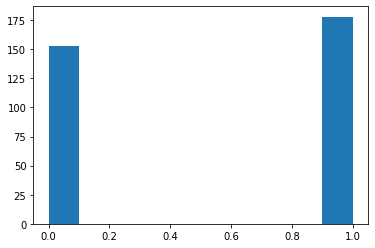

In [17]:
# plt.figure(figsize=(16, 20))
plt.hist((plot_02['nafld']))#,  
#               sym="o", 
#               labels=['nafld'])
# plt.ylim(0,150)
plt.show()

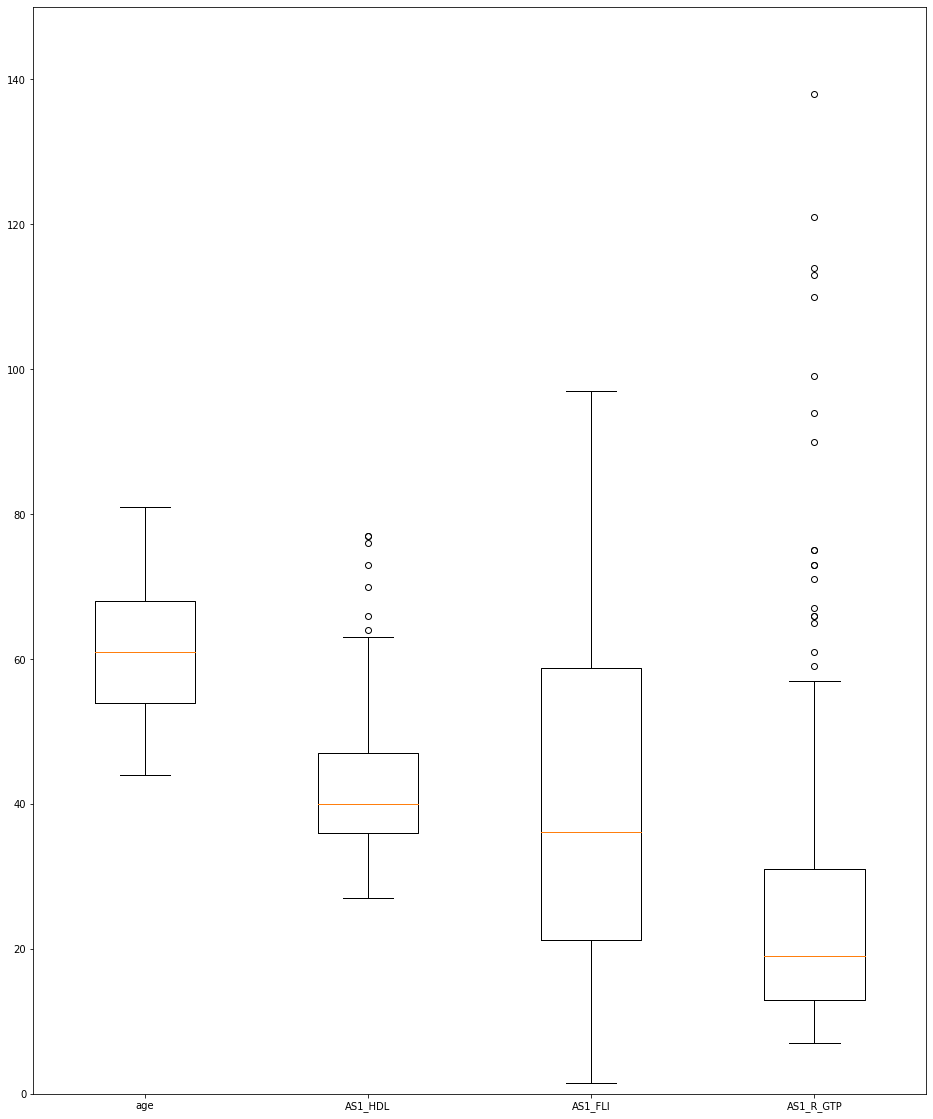

In [9]:
plt.figure(figsize=(16, 20))
plt.boxplot((plot_02['age'],plot_02['AS1_HDL'],plot_02['AS1_FLI'], plot_02['AS1_R_GTP']),  
              sym="o", 
              labels=['age','AS1_HDL','AS1_FLI','AS1_R_GTP'])
plt.ylim(0,150)
plt.show()

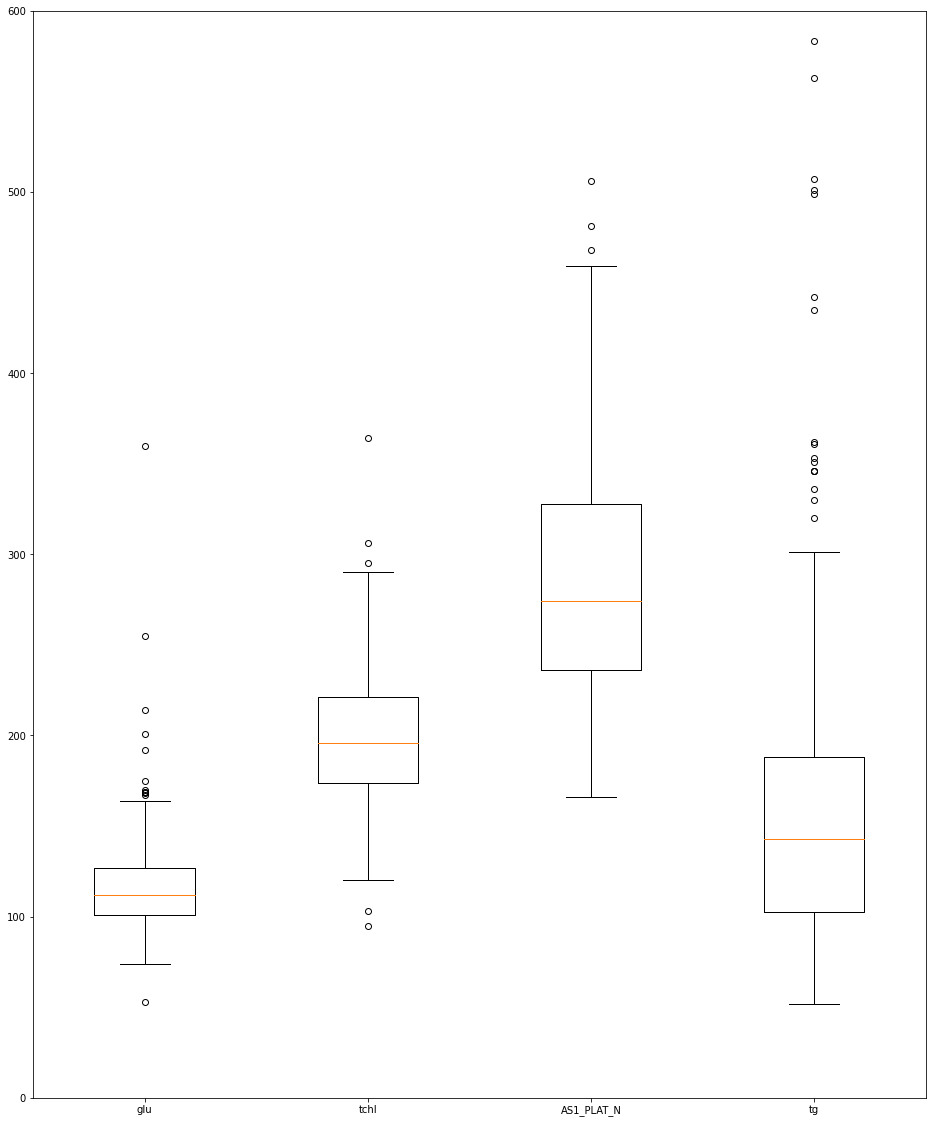

In [10]:
plt.figure(figsize=(16, 20))
plt.boxplot((plot_02['glu'],plot_02['tchl'],plot_02['AS1_PLAT_N'],plot_02['tg']),
           sym="o",
           labels=['glu','tchl','AS1_PLAT_N','tg'])
plt.ylim(0,600)
plt.show()

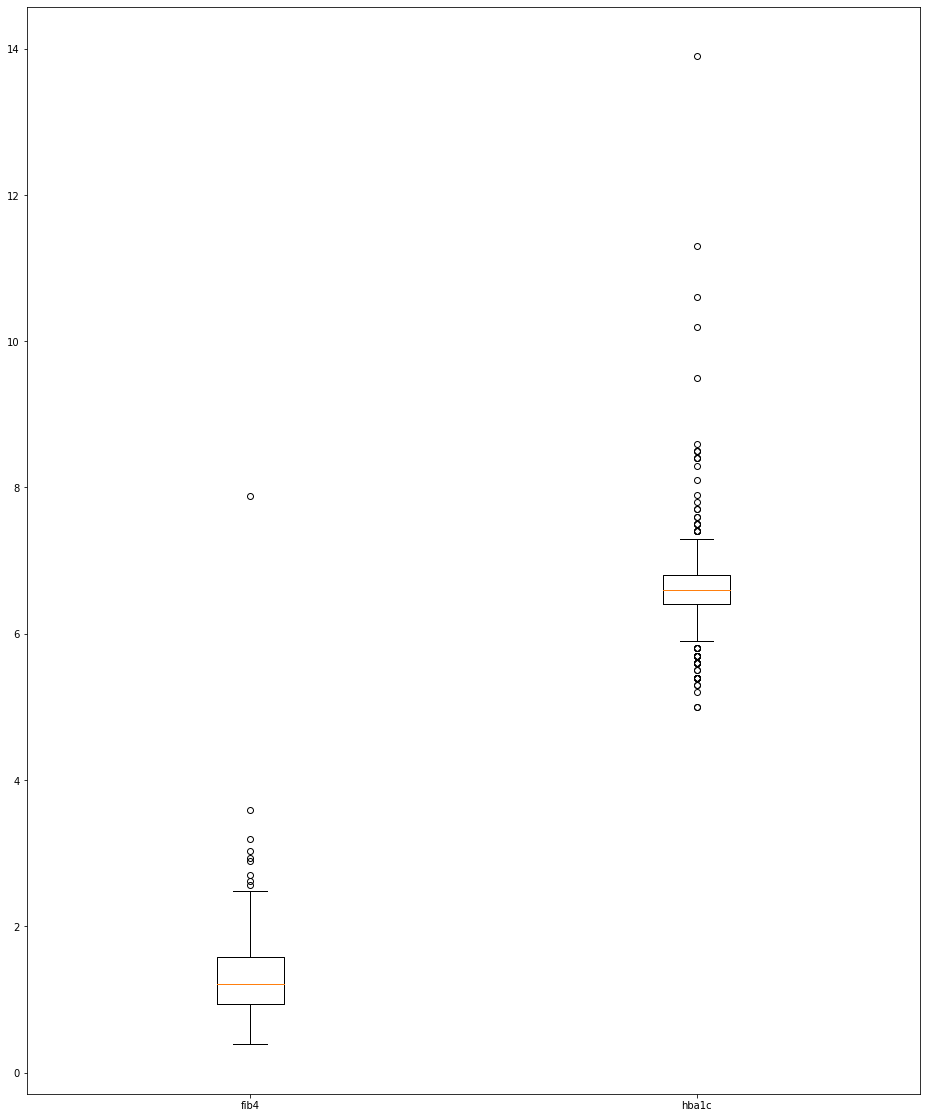

In [11]:
plt.figure(figsize=(16, 20))
plt.boxplot((plot_02['fib4'],plot_02['hba1c']), 
              sym="o", 
              labels=['fib4','hba1c'])
plt.show()

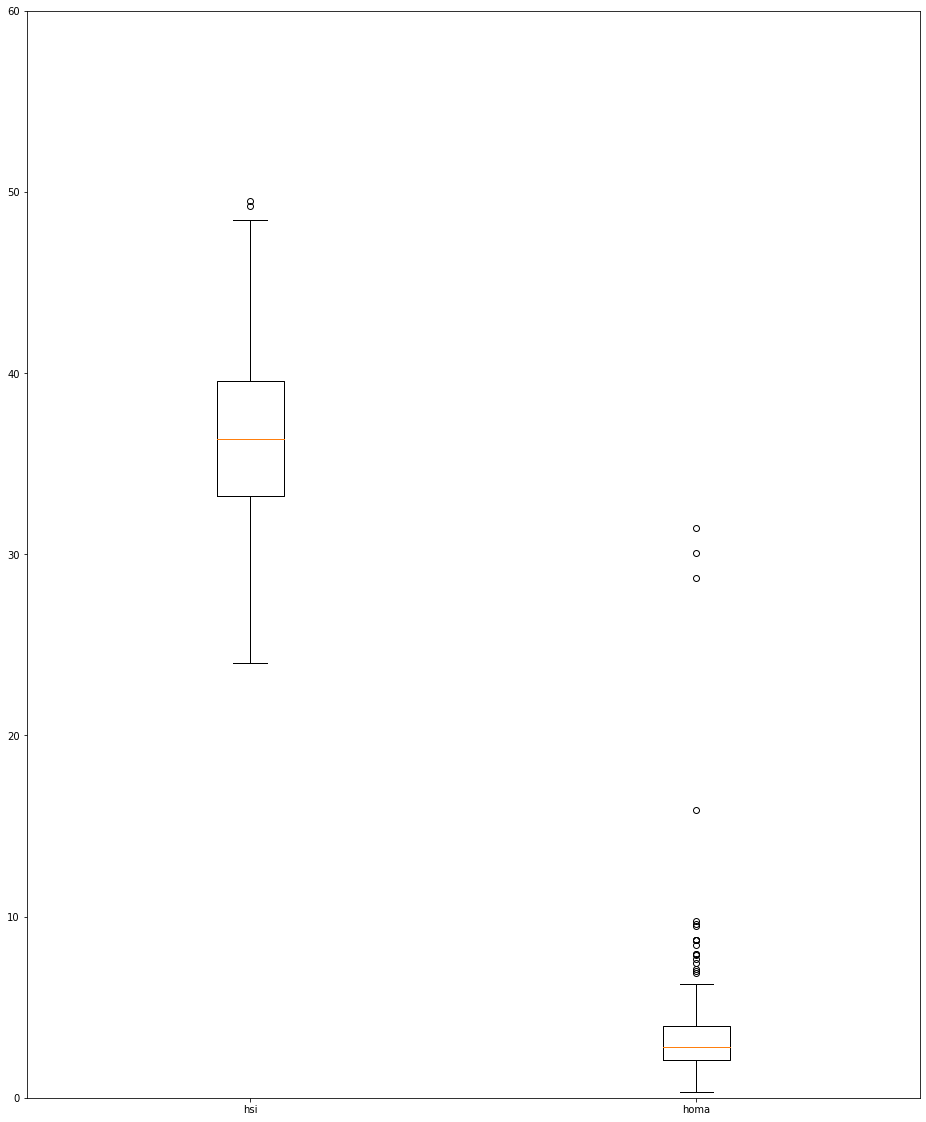

In [12]:
plt.figure(figsize=(16, 20))
plt.boxplot((plot_02['hsi'],plot_02['homa']),
           sym="o",
           labels=['hsi','homa'])
plt.ylim(0,60)
plt.show()

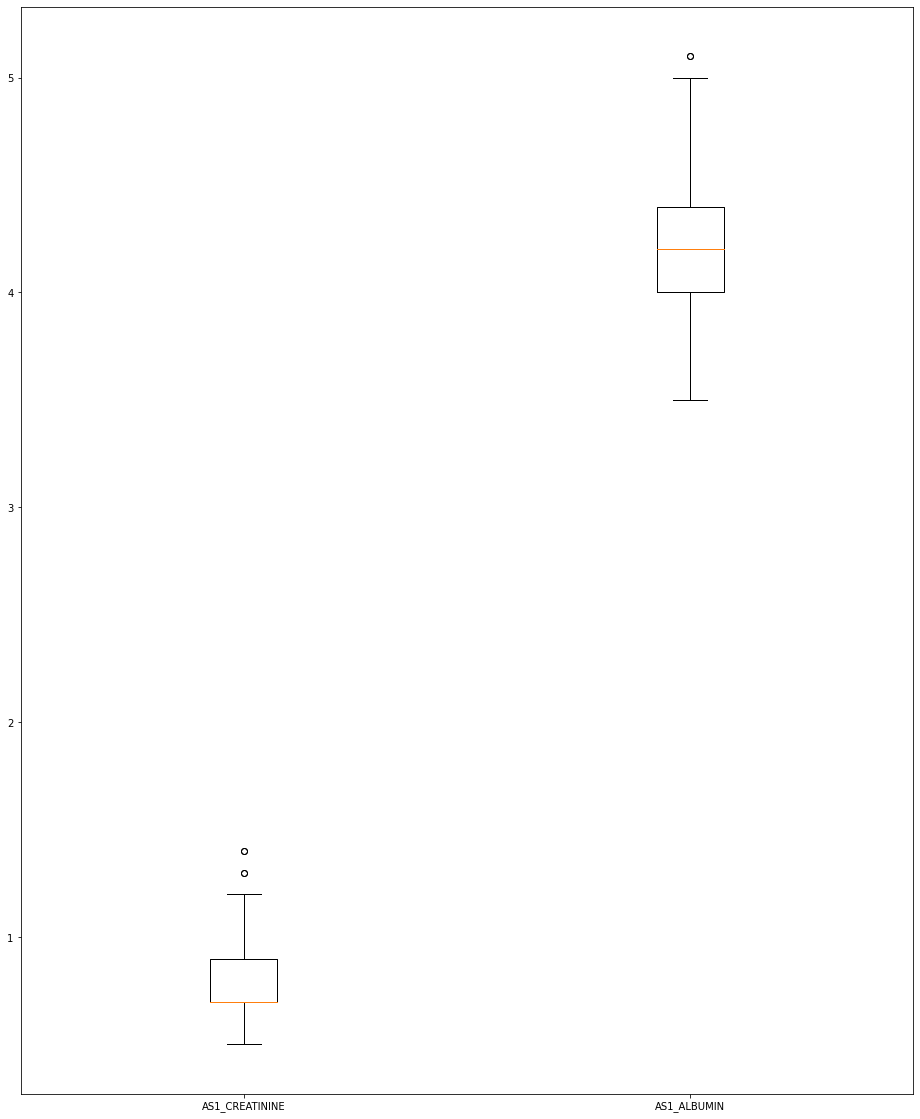

In [13]:
plt.figure(figsize=(16, 20))
plt.boxplot((plot_02['AS1_CREATININE'],plot_02['AS1_ALBUMIN']),
           sym="o",
           labels=['AS1_CREATININE','AS1_ALBUMIN'])
plt.show()

In [ ]:
ndata = plot_01.loc[381:,:]

In [32]:
sample_01 = ndata.sample(n = 331, replace = False, random_state = 1, axis = 0)

In [33]:
sample_01.head()

,id,phase,sex,age,glu,ast/alt,tchl,tg,bmigr,hsi,fib4,homa,hba1c,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS,NAFLD1_FLI,GROUP,dm
1886,EPI18_079_005628,7,1,66,91.0,1.0,133,49,2,32.312243,1.216723,2.269383,4.8,0,0.9,4.2,21,55,314,14.512882,-3.401225,0,1,0
656,EPI18_079_000931,7,2,54,78.0,1.0,232,46,2,32.466426,1.039145,1.117037,5.2,0,0.9,5.0,14,89,307,3.248749,-4.418576,0,1,0
1001,EPI18_079_002138,7,1,55,97.0,1.0,204,122,4,40.541314,1.037208,4.718272,5.6,1,1.2,4.3,24,41,284,47.644780,-2.980208,1,4,0
2206,EPI18_079_006828,7,2,65,97.0,1.0,233,111,4,35.638398,1.100932,1.796296,5.8,0,0.7,3.9,11,52,261,21.073064,-1.935083,1,4,0
2339,EPI18_079_007307,7,2,73,97.0,1.0,208,289,4,36.051127,1.176605,2.323210,5.8,1,0.7,4.1,16,31,319,47.558249,-2.821212,1,4,0


In [38]:
sample_02 = ndata.sample(n = 331, replace = False, random_state = 2, axis = 0)
sample_03 = ndata.sample(n = 331, replace = False, random_state = 3, axis = 0)
sample_04 = ndata.sample(n = 331, replace = False, random_state = 4, axis = 0)
sample_05 = ndata.sample(n = 331, replace = False, random_state = 5, axis = 0)
sample_06 = ndata.sample(n = 331, replace = False, random_state = 6, axis = 0)
sample_07 = ndata.sample(n = 331, replace = False, random_state = 7, axis = 0)
sample_08 = ndata.sample(n = 331, replace = False, random_state = 8, axis = 0)
sample_09 = ndata.sample(n = 331, replace = False, random_state = 9, axis = 0)
sample_10 = ndata.sample(n = 331, replace = False, random_state = 10, axis = 0)

In [45]:
sample_01_desc = sample_01.describe()
sample_02_desc = sample_02.describe()
sample_03_desc = sample_03.describe()
sample_04_desc = sample_04.describe()
sample_05_desc = sample_05.describe()
sample_06_desc = sample_06.describe()
sample_07_desc = sample_07.describe()
sample_08_desc = sample_08.describe()
sample_09_desc = sample_09.describe()
sample_10_desc = sample_10.describe()

In [52]:
sample_01_desc

,phase,sex,age,glu,ast/alt,tchl,tg,bmigr,hsi,fib4,homa,hba1c,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS,NAFLD1_FLI,GROUP,dm
count,331.0,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0
mean,7.0,1.670695,62.939577,90.030211,1.027190,191.969789,122.625378,3.012085,33.058502,1.581006,1.931320,5.525076,0.229607,0.804230,4.216616,20.084592,45.501511,263.196375,24.307697,-2.434092,0.407855,1.836858,0.0
std,0.0,0.470672,7.981188,8.180853,0.162884,33.166600,71.631497,0.877240,4.031909,1.389590,0.856979,0.342725,0.421217,0.161001,0.281547,15.545401,10.390956,57.206172,18.519634,0.947200,0.492180,1.171881,0.0
min,7.0,1.000000,51.000000,58.000000,1.000000,107.000000,32.000000,1.000000,19.423262,0.651380,0.395062,4.500000,0.000000,0.500000,3.600000,5.000000,23.000000,129.000000,1.031871,-5.696739,0.000000,1.000000,0.0
25%,7.0,1.000000,56.000000,84.000000,1.000000,168.000000,81.000000,2.000000,30.121856,1.107143,1.331852,5.300000,0.000000,0.700000,4.000000,11.000000,38.000000,222.000000,9.459905,-3.006606,0.000000,1.000000,0.0
50%,7.0,2.000000,61.000000,89.000000,1.000000,189.000000,102.000000,3.000000,32.569781,1.360480,1.760000,5.500000,0.000000,0.700000,4.200000,15.000000,44.000000,259.000000,17.989581,-2.400691,0.000000,1.000000,0.0
75%,7.0,2.000000,70.000000,95.000000,1.000000,214.500000,147.500000,4.000000,35.687555,1.721150,2.330000,5.750000,0.000000,0.900000,4.400000,22.500000,52.000000,300.500000,36.366136,-1.903594,1.000000,2.000000,0.0
max,7.0,2.000000,81.000000,122.000000,2.000000,296.000000,623.000000,4.000000,45.366331,24.158218,6.671111,6.400000,1.000000,1.400000,5.300000,121.000000,89.000000,424.000000,89.005381,0.196979,1.000000,4.000000,0.0


In [50]:
paste_sample = pd.concat([sample_01_desc,sample_02_desc,sample_03_desc,sample_04_desc,sample_05_desc,
                         sample_06_desc,sample_07_desc,sample_08_desc,sample_09_desc,sample_10_desc,])

In [56]:
paste_sample

,phase,sex,age,glu,ast/alt,tchl,tg,bmigr,hsi,fib4,homa,hba1c,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS,NAFLD1_FLI,GROUP,dm
count,331.0,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0
mean,7.0,1.670695,62.939577,90.030211,1.027190,191.969789,122.625378,3.012085,33.058502,1.581006,1.931320,5.525076,0.229607,0.804230,4.216616,20.084592,45.501511,263.196375,24.307697,-2.434092,0.407855,1.836858,0.0
std,0.0,0.470672,7.981188,8.180853,0.162884,33.166600,71.631497,0.877240,4.031909,1.389590,0.856979,0.342725,0.421217,0.161001,0.281547,15.545401,10.390956,57.206172,18.519634,0.947200,0.492180,1.171881,0.0
min,7.0,1.000000,51.000000,58.000000,1.000000,107.000000,32.000000,1.000000,19.423262,0.651380,0.395062,4.500000,0.000000,0.500000,3.600000,5.000000,23.000000,129.000000,1.031871,-5.696739,0.000000,1.000000,0.0
25%,7.0,1.000000,56.000000,84.000000,1.000000,168.000000,81.000000,2.000000,30.121856,1.107143,1.331852,5.300000,0.000000,0.700000,4.000000,11.000000,38.000000,222.000000,9.459905,-3.006606,0.000000,1.000000,0.0
50%,7.0,2.000000,61.000000,89.000000,1.000000,189.000000,102.000000,3.000000,32.569781,1.360480,1.760000,5.500000,0.000000,0.700000,4.200000,15.000000,44.000000,259.000000,17.989581,-2.400691,0.000000,1.000000,0.0
75%,7.0,2.000000,70.000000,95.000000,1.000000,214.500000,147.500000,4.000000,35.687555,1.721150,2.330000,5.750000,0.000000,0.900000,4.400000,22.500000,52.000000,300.500000,36.366136,-1.903594,1.000000,2.000000,0.0
max,7.0,2.000000,81.000000,122.000000,2.000000,296.000000,623.000000,4.000000,45.366331,24.158218,6.671111,6.400000,1.000000,1.400000,5.300000,121.000000,89.000000,424.000000,89.005381,0.196979,1.000000,4.000000,0.0
count,331.0,331.000000,331.000000,331.000000,330.000000,331.000000,331.000000,331.000000,330.000000,330.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0
mean,7.0,1.673716,62.534743,89.749245,1.054545,191.631420,124.978852,2.960725,32.823450,1.526590,1.896922,5.510574,0.217523,0.809970,4.213897,20.791541,45.199396,258.697885,23.570351,-2.447344,0.377644,1.728097,0.0


In [78]:
paste_sample.to_excel('/home/ekim_reverse/PyCode/study/paste_sample.xlsx')

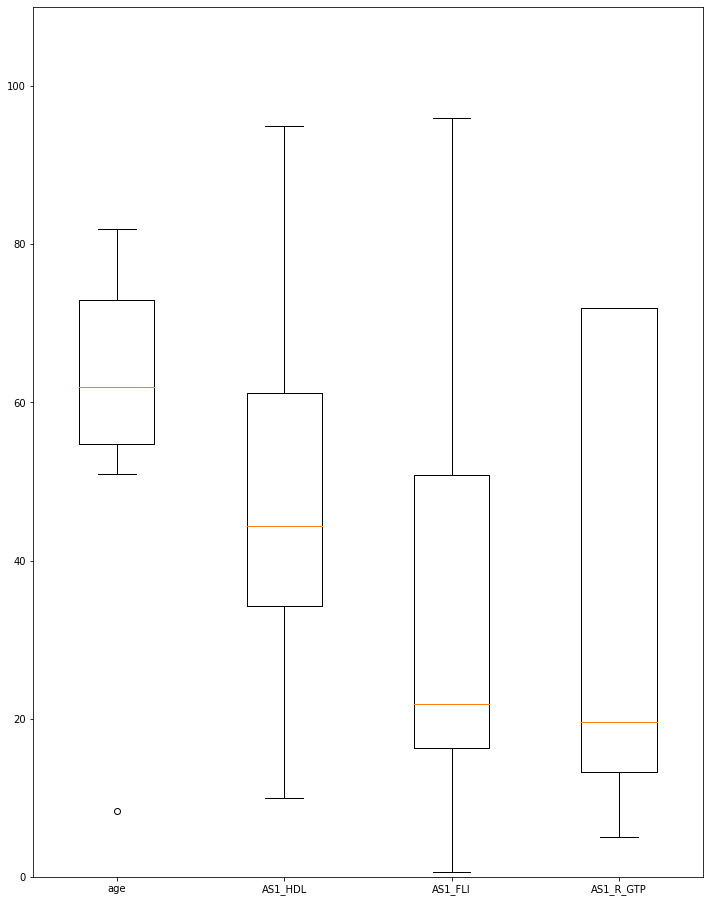

In [73]:
plt.figure(figsize=(12, 16))
plt.boxplot((normal_data['age'],normal_data['AS1_HDL'],normal_data['AS1_FLI'], normal_data['AS1_R_GTP']),  
              sym="o", 
              labels=['age','AS1_HDL','AS1_FLI','AS1_R_GTP'])
plt.ylim(0,110)
plt.show()

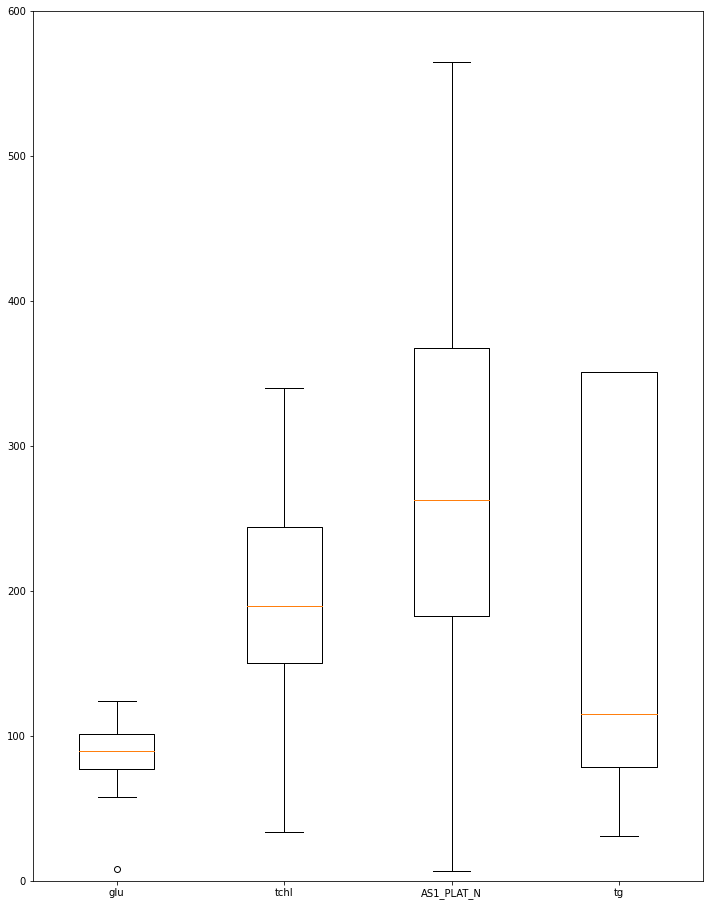

In [74]:
plt.figure(figsize=(12, 16))
plt.boxplot((normal_data['glu'],normal_data['tchl'],normal_data['AS1_PLAT_N'],normal_data['tg']),
           sym="o",
           labels=['glu','tchl','AS1_PLAT_N','tg'])
plt.ylim(0,600)
plt.show()

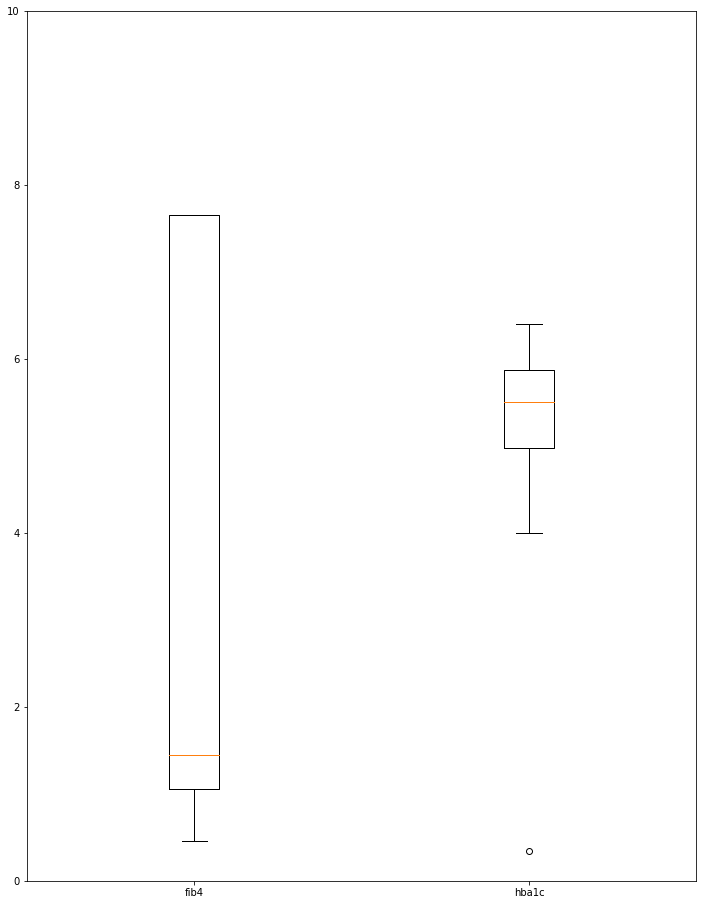

In [75]:
plt.figure(figsize=(12, 16))
plt.boxplot((normal_data['fib4'],normal_data['hba1c']), 
              sym="o", 
              labels=['fib4','hba1c'])
plt.ylim(0,10)
plt.show()

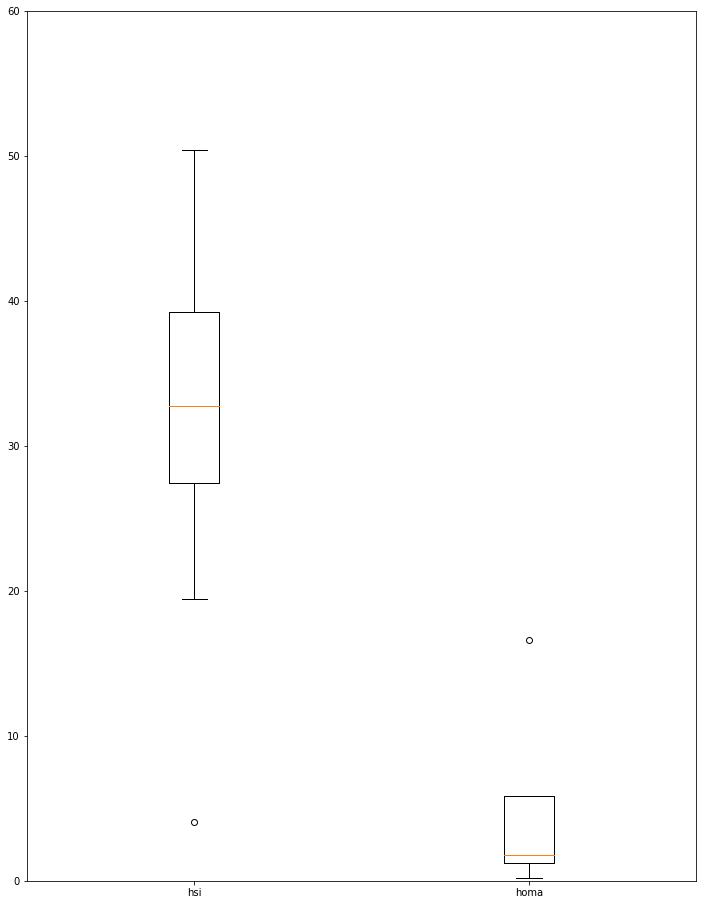

In [76]:
plt.figure(figsize=(12, 16))
plt.boxplot((normal_data['hsi'],normal_data['homa']),
           sym="o",
           labels=['hsi','homa'])
plt.ylim(0,60)
plt.show()

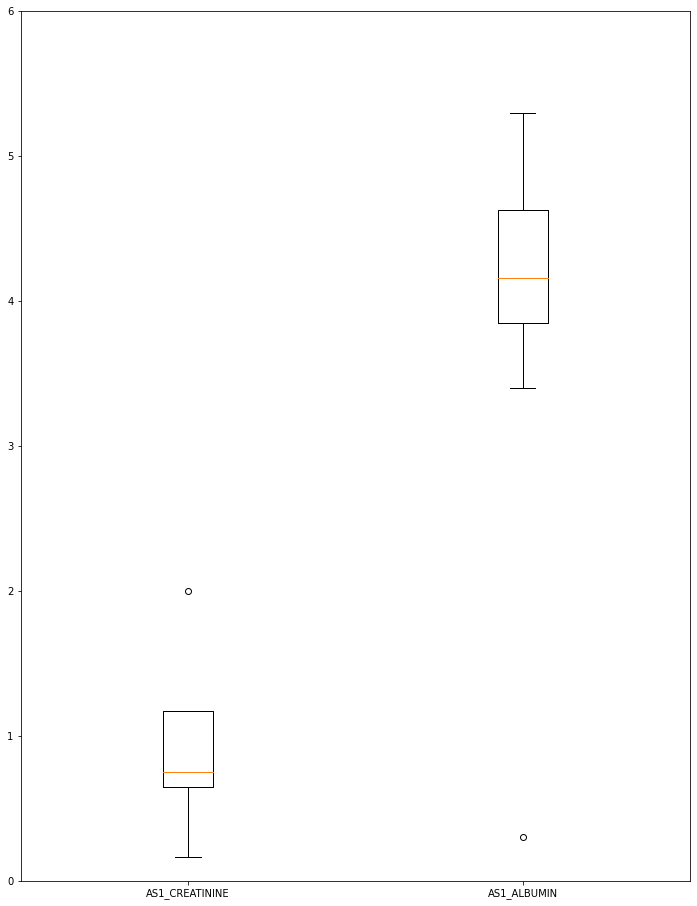

In [77]:
plt.figure(figsize=(12, 16))
plt.boxplot((normal_data['AS1_CREATININE'],normal_data['AS1_ALBUMIN']),
           sym="o",
           labels=['AS1_CREATININE','AS1_ALBUMIN'])
plt.ylim(0,6)
plt.show()

In [40]:
paste_data = pd.concat([sample_01,sample_02,sample_03,sample_04,sample_05,
                        sample_06,sample_07,sample_08,sample_09,sample_10])

In [57]:
normal_data = paste_data.describe()

In [58]:
normal_data

,phase,sex,age,glu,ast/alt,tchl,tg,bmigr,hsi,fib4,homa,hba1c,nafld,AS1_CREATININE,AS1_ALBUMIN,AS1_R_GTP,AS1_HDL,AS1_PLAT_N,AS1_FLI,AS1_NFS,NAFLD1_FLI,GROUP,dm
count,3310.0,3310.000000,3310.000000,3310.000000,3309.000000,3310.000000,3310.000000,3310.000000,3309.000000,3309.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.00000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.0
mean,7.0,1.659819,63.007855,89.801208,1.032638,190.944411,124.723867,2.995770,32.948590,1.520998,1.907885,5.516888,0.215408,0.807583,4.215982,20.154079,44.81571,264.945015,24.511867,-2.471863,0.392749,1.827190,0.0
std,0.0,0.473842,8.332465,8.280866,0.177715,34.070828,72.294815,0.888451,4.049378,0.927616,0.929066,0.340828,0.411167,0.166343,0.300913,18.999129,9.96427,61.681833,19.334465,0.959607,0.488436,1.172769,0.0
min,7.0,1.000000,51.000000,58.000000,1.000000,96.000000,31.000000,1.000000,19.423262,0.452764,0.222222,4.000000,0.000000,0.500000,3.400000,5.000000,23.00000,7.000000,0.595962,-6.891086,0.000000,1.000000,0.0
25%,7.0,1.000000,56.000000,84.000000,1.000000,168.000000,81.000000,2.000000,30.152312,1.093553,1.340000,5.300000,0.000000,0.700000,4.000000,11.000000,38.00000,223.000000,9.326701,-3.051999,0.000000,1.000000,0.0
50%,7.0,2.000000,61.000000,89.000000,1.000000,188.000000,106.000000,3.000000,32.599533,1.362028,1.703704,5.500000,0.000000,0.700000,4.100000,14.000000,44.00000,260.000000,18.594092,-2.471024,0.000000,1.000000,0.0
75%,7.0,2.000000,70.000000,94.000000,1.000000,212.000000,147.000000,4.000000,35.483930,1.745225,2.250370,5.700000,0.000000,0.900000,4.400000,22.000000,50.00000,302.000000,35.737580,-1.826829,1.000000,2.000000,0.0
max,7.0,2.000000,82.000000,124.000000,2.000000,340.000000,963.000000,4.000000,50.412197,25.383444,16.644444,6.400000,1.000000,2.000000,5.300000,222.000000,95.00000,565.000000,95.940849,0.920023,1.000000,4.000000,0.0


In [79]:
normal_data.to_excel('/home/ekim_reverse/PyCode/study/normal_data.xlsx')

In [14]:
model = sm.ols(formula = 'dm~age+glu+tchl+tg+hsi+fib4+homa+hba1c+AS1_CREATININE+AS1_ALBUMIN+AS1_R_GTP+AS1_HDL+AS1_PLAT_N+AS1_FLI', data = plot_02).fit()

In [15]:
model.summary()

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dm   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -22.57
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               1.00
Time:                        10:14:03   Log-Likelihood:                 11040.
No. Observations:                 331   AIC:                        -2.205e+04
Df Residuals:                     316   BIC:                        -2.199e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0000   1.04e-15   9.61e+14      0.000       1.000       1.000
age            -3.253e-18   6.07e-18     -0.536      0.592   -1.52e-17    8.69e-18
glu            -2.494e-18   2.17e-18     -1.150      0.251   -6.76e-18    1.77e-18
tchl           -9.622e-19    1.3e-18     -0.738      0.461   -3.53e-18     1.6e-18
tg              2.765e-18   6.17e-19      4.478      0.000    1.55e-18    3.98e-18
hsi            -5.031e-17    1.2e-17     -4.205      0.000   -7.38e-17   -2.68e-17
fib4             -3.6e-17   8.93e-17     -0.403      0.687   -2.12e-16     1.4e-16
homa           -2.624e-17   7.05e-18     -3.719      0.000   -4.01e-17   -1.24e-17
hba1c          -7.806e-17   6.49e-17     -1.203      0.230   -2.06e-16    4.96e-17
AS1_CREATININE -3.469e-17   2.99e-16     -0.116      0.908   -6.23e-16    5.54e-16
AS1_ALBUMIN    -2.082e-17   1.71e-16     -0.122      0.903   -3.58e-16    3.16e-16
AS1_R_GTP       2.311e-18    4.3e-19      5.369      0.000    1.46e-18    3.16e-18
AS1_HDL         1.477e-17   5.49e-18      2.690      0.008    3.97e-18    2.56e-17
AS1_PLAT_N      1.884e-18   7.99e-19      2.358      0.019    3.12e-19    3.46e-18
AS1_FLI         1.109e-17   2.58e-18      4.299      0.000    6.01e-18    1.62e-17
==============================================================================
Omnibus:                      256.960   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10794.471
Skew:                          -2.713   Prob(JB):                         0.00
Kurtosis:                      30.445   Cond. No.                     9.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model_02 = sm.ols(formula = 'dm~age+glu+tchl+hsi+fib4+homa+hba1c+AS1_HDL+AS1_FLI', data = plot_02).fit()

In [17]:
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dm   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -35.67
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               1.00
Time:                        10:14:07   Log-Likelihood:                 10775.
No. Observations:                 331   AIC:                        -2.153e+04
Df Residuals:                     321   BIC:                        -2.149e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   1.55e-15   6.45e+14      0.000       1.000       1.000
age        -1.529e-17   1.31e-17     -1.167      0.244   -4.11e-17    1.05e-17
glu        -1.518e-18   4.79e-18     -0.317      0.751   -1.09e-17     7.9e-18
tchl       -5.062e-18   2.76e-18     -1.834      0.068   -1.05e-17    3.69e-19
hsi         9.324e-18   2.61e-17      0.357      0.721   -4.21e-17    6.07e-17
fib4       -2.255e-17   1.77e-16     -0.127      0.899   -3.71e-16    3.25e-16
homa       -6.386e-17   1.53e-17     -4.168      0.000    -9.4e-17   -3.37e-17
hba1c       4.857e-17   1.43e-16      0.339      0.735   -2.33e-16     3.3e-16
AS1_HDL     4.364e-17   1.16e-17      3.778      0.000    2.09e-17    6.64e-17
AS1_FLI     3.469e-18   5.32e-18      0.652      0.515      -7e-18    1.39e-17
==============================================================================
Omnibus:                      379.665   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41086.978
Skew:                           4.760   Prob(JB):                         0.00
Kurtosis:                      56.745   Cond. No.                     3.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model_03 = sm.ols(formula = 'dm~homa+age', data = plot_02).fit()

In [19]:
model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dm   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -164.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               1.00
Time:                        10:14:31   Log-Likelihood:                 10991.
No. Observations:                 331   AIC:                        -2.198e+04
Df Residuals:                     328   BIC:                        -2.196e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000   3.65e-16   2.74e+15      0.000       1.000       1.000
homa        1.718e-17   7.25e-18      2.370      0.018    2.92e-18    3.14e-17
age        -1.084e-18   5.93e-18     -0.183      0.855   -1.27e-17    1.06e-17
==============================================================================
Omnibus:                      640.672   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457248.672
Skew:                         -12.158   Prob(JB):                         0.00
Kurtosis:                     183.451   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

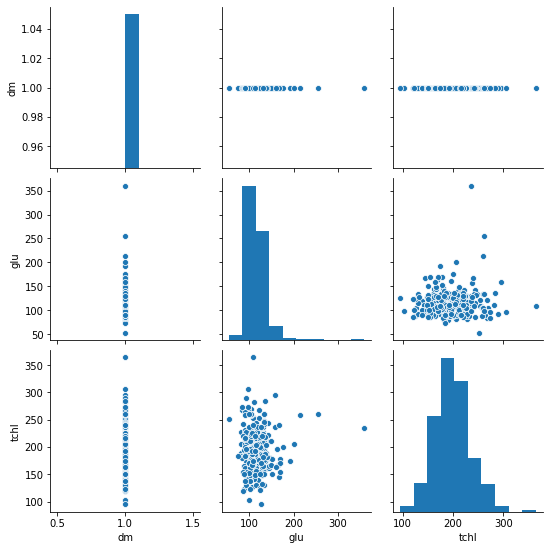

In [38]:
sns.pairplot(plot_02[['dm','glu','tchl']])

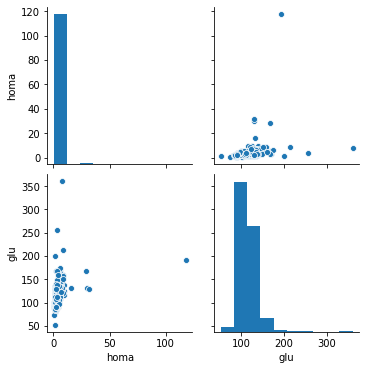

In [22]:
sns.pairplot(plot_02[['homa','glu']])

In [ ]:
# https://bkshin.tistory.com/entry/DATA-20-%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC-VIF

In [39]:
y, X = dmatrices('dm ~age+glu+tchl+hsi+fib4+homa+hba1c+AS1_HDL+AS1_FLI', plot_02, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,247.934978,Intercept
1,1.298897,age
2,1.549799,glu
3,1.065641,tchl
4,1.652379,hsi
5,1.265935,fib4
6,1.187597,homa
7,1.421014,hba1c
8,1.118254,AS1_HDL
9,1.649772,AS1_FLI


In [34]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [32]:
vif["VIF Factor"]

0    247.934978
1      1.298897
2      1.549799
3      1.065641
4      1.652379
5      1.265935
6      1.187597
7      1.421014
8      1.118254
9      1.649772
Name: VIF Factor, dtype: float64

In [44]:
plot_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 379
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              331 non-null    object 
 1   phase           331 non-null    int64  
 2   sex             331 non-null    int64  
 3   age             331 non-null    int64  
 4   glu             331 non-null    float64
 5   ast/alt         331 non-null    float64
 6   tchl            331 non-null    int64  
 7   tg              331 non-null    int64  
 8   bmigr           331 non-null    int64  
 9   hsi             331 non-null    float64
 10  fib4            331 non-null    float64
 11  homa            331 non-null    float64
 12  hba1c           331 non-null    float64
 13  nafld           331 non-null    int64  
 14  AS1_CREATININE  331 non-null    float64
 15  AS1_ALBUMIN     331 non-null    float64
 16  AS1_R_GTP       331 non-null    int64  
 17  AS1_HDL         331 non-null    int

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faba48790b8>,
      dtype=object)

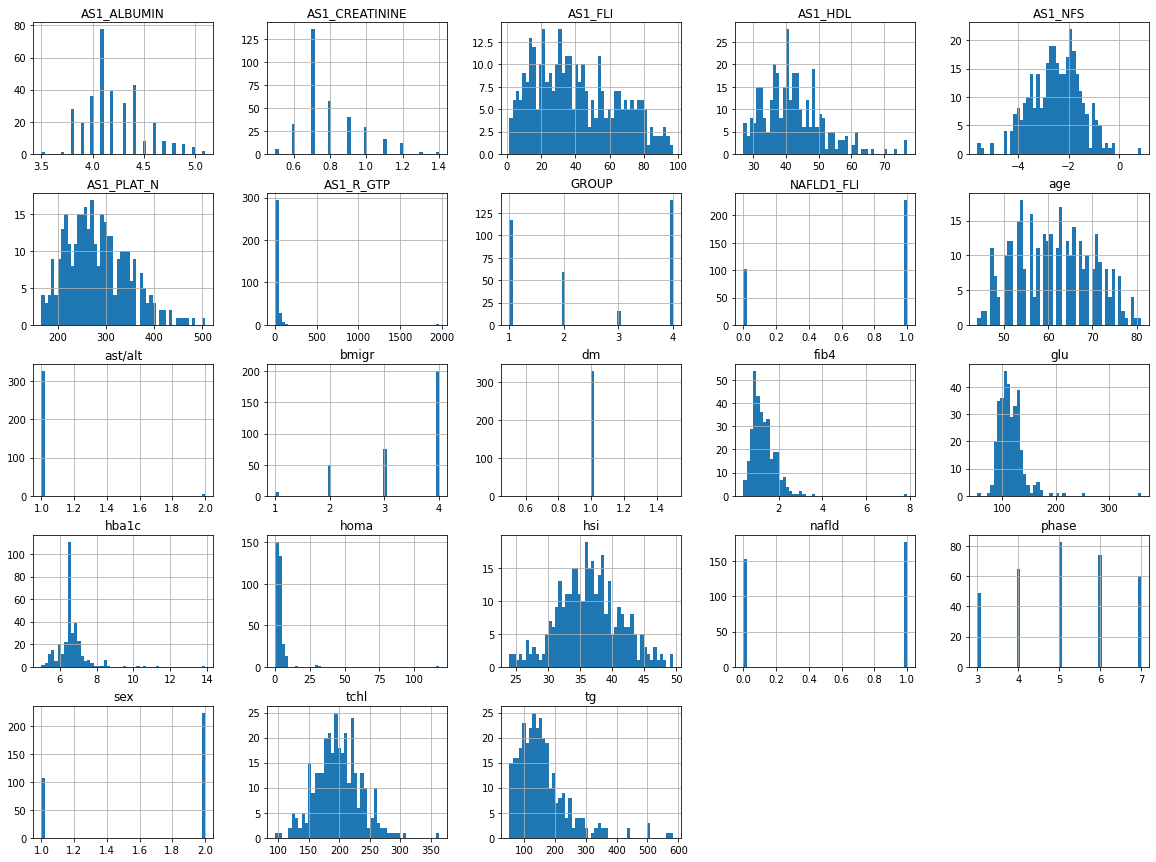

In [46]:
plot_02.hist(bins=50, figsize=(20,15))